# Proyecto de clustering de segmentación de países por datos socio-económicos

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [226]:
df_country = pd.read_csv('/Users/andressanchez/Desktop/Data Scientist/Clustering course with Python and scikit-learn/archive/Country-data.csv')

In [227]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [228]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [229]:
df_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

## Manejando valores nulos

In [230]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Validando duplicados

In [231]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Análisis de distribución

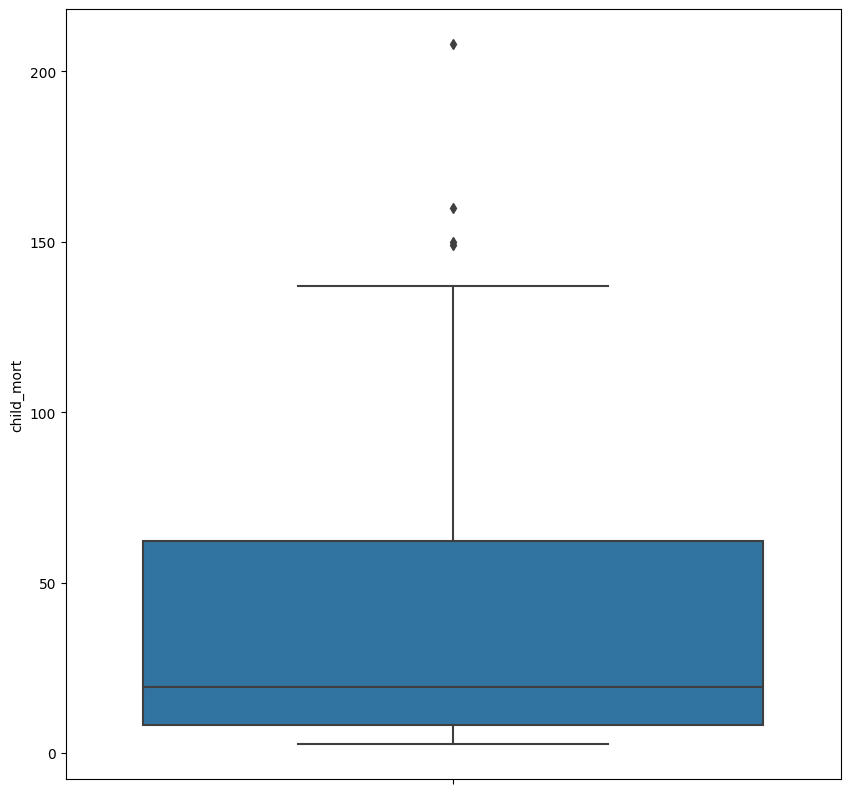

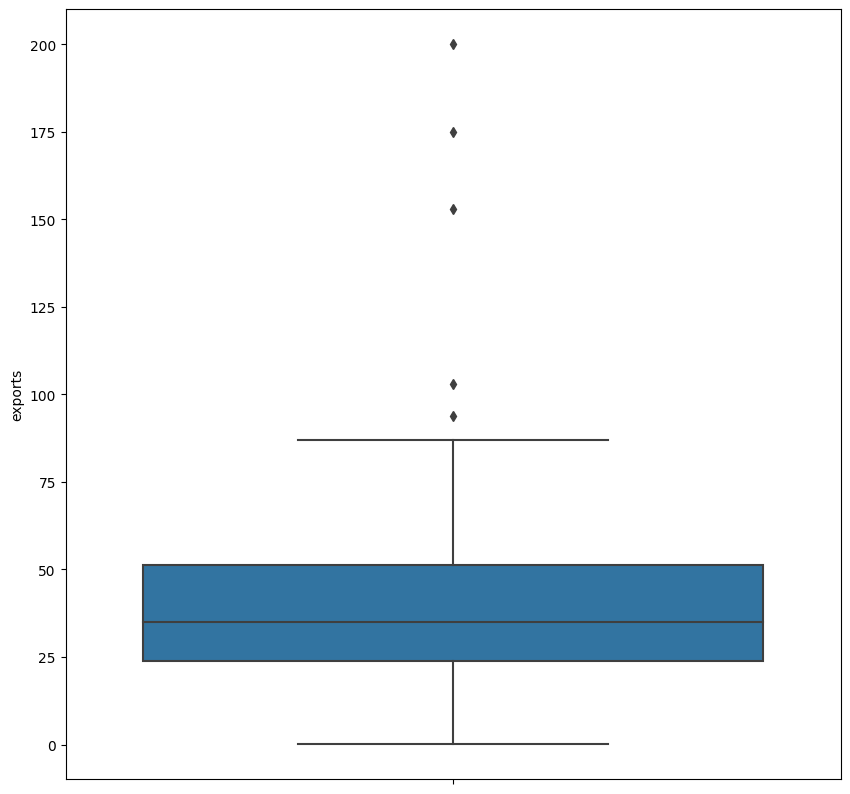

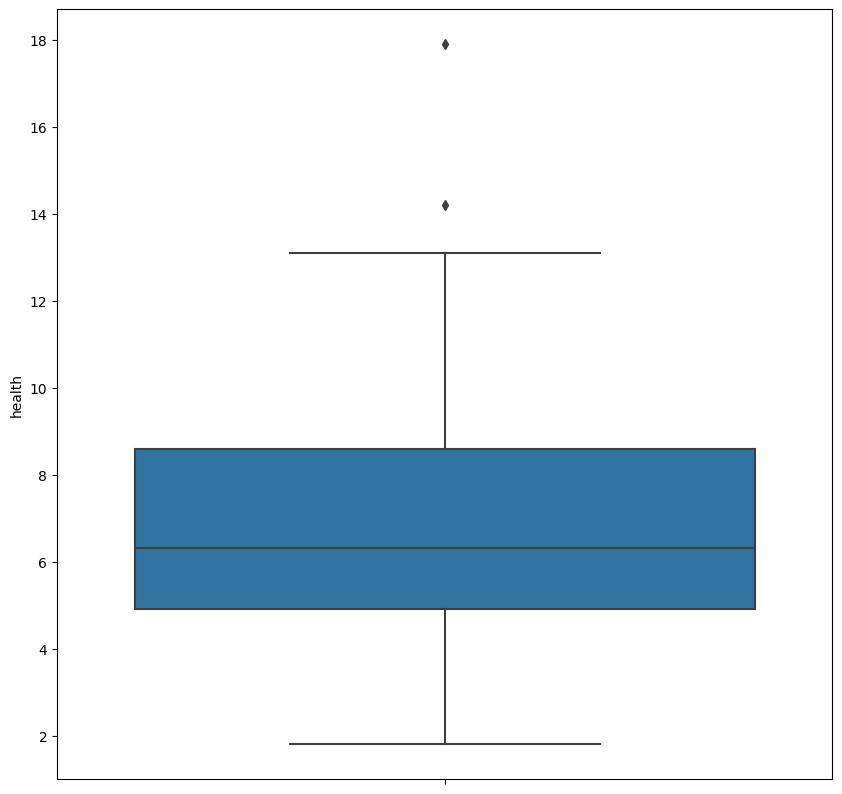

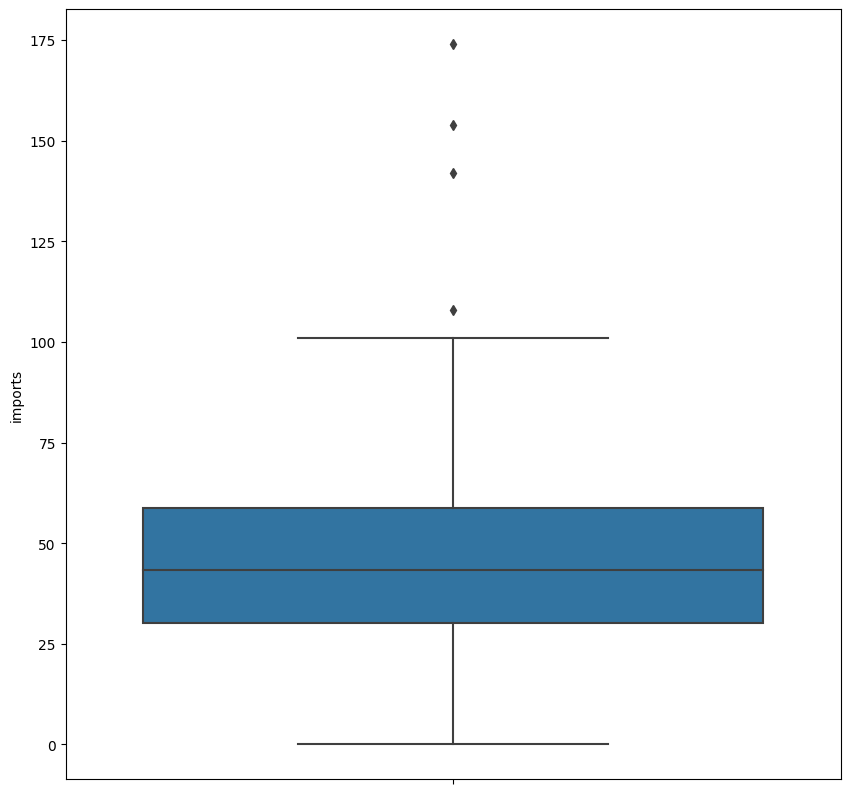

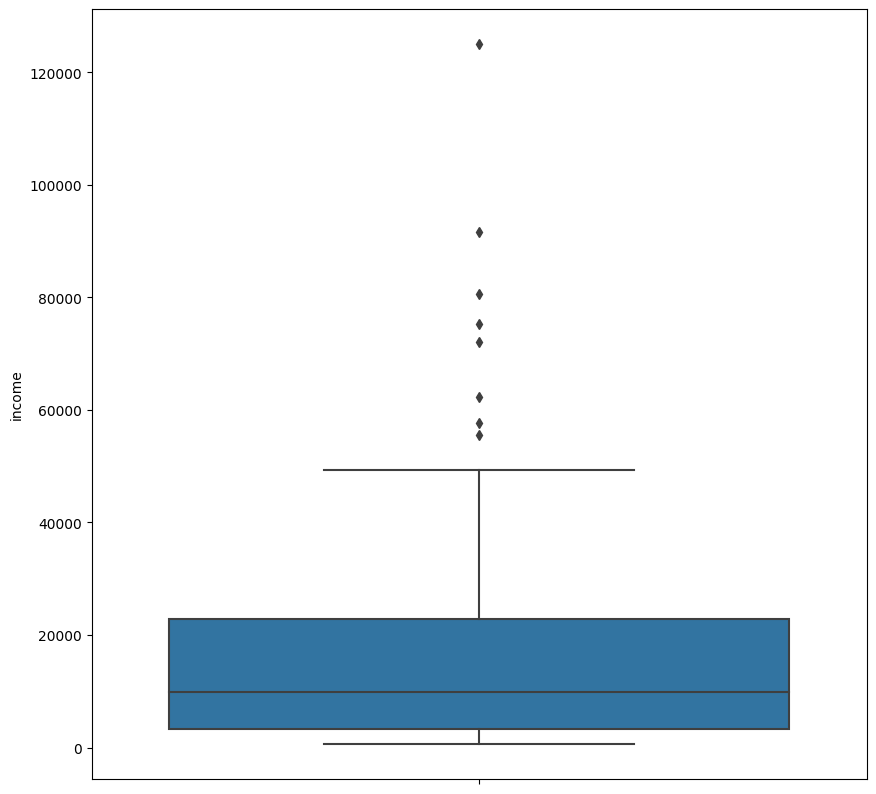

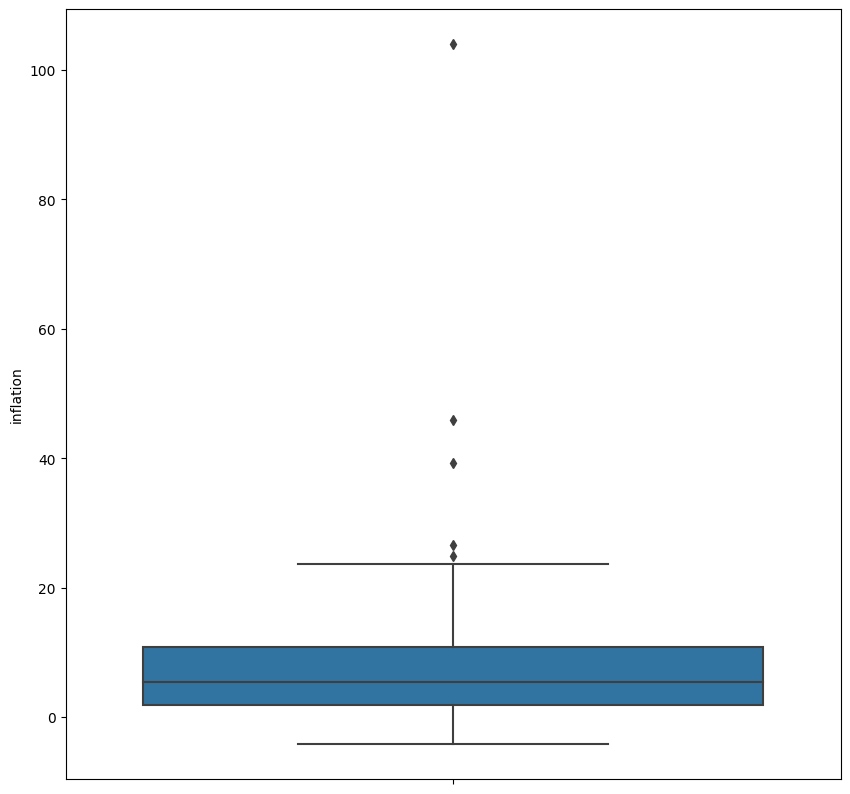

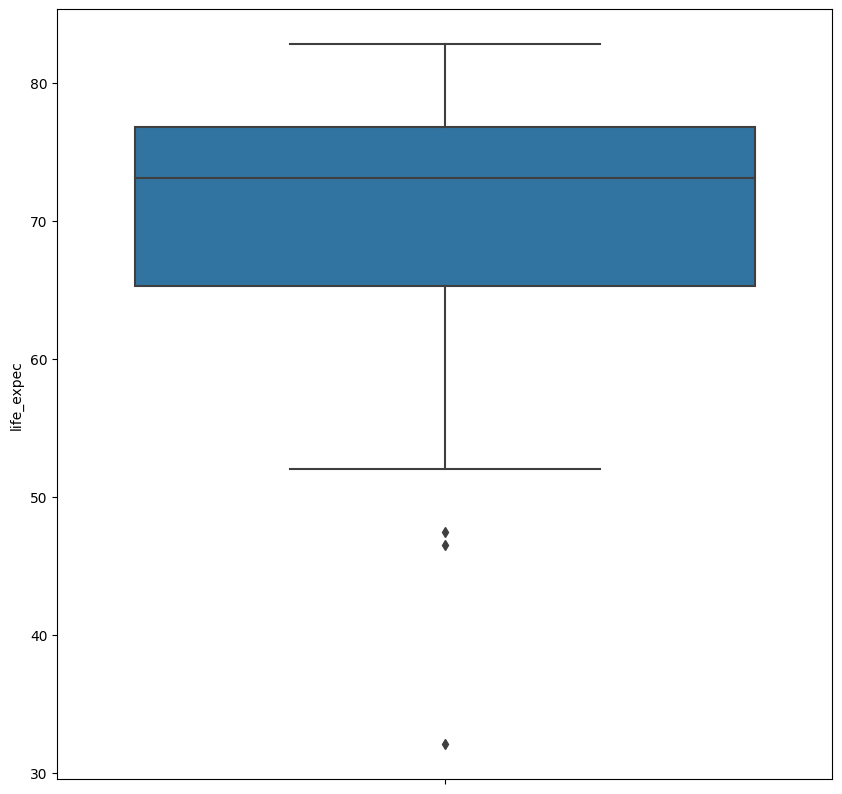

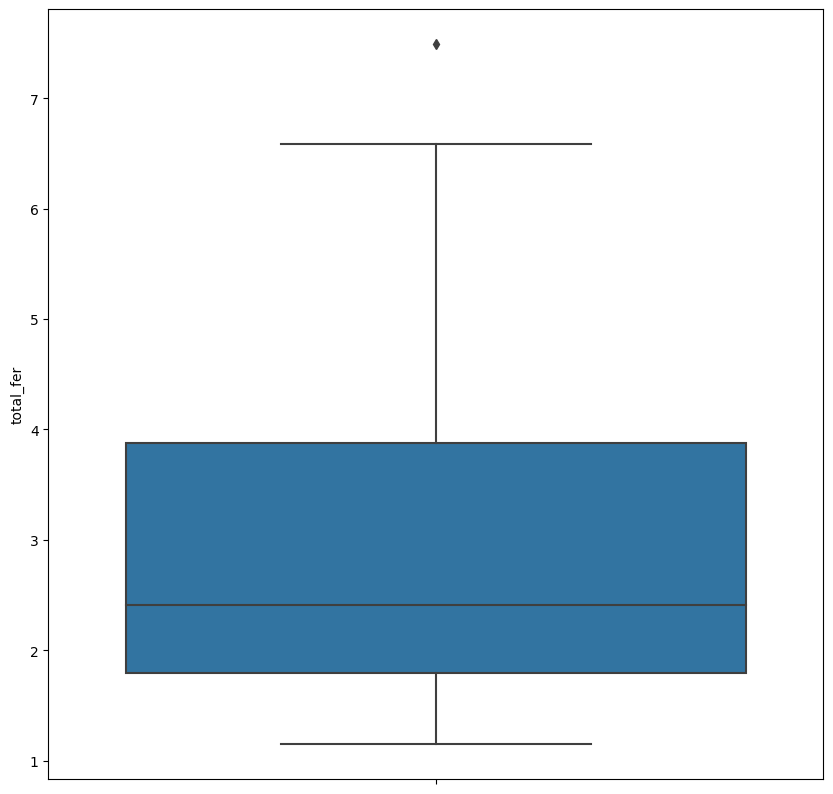

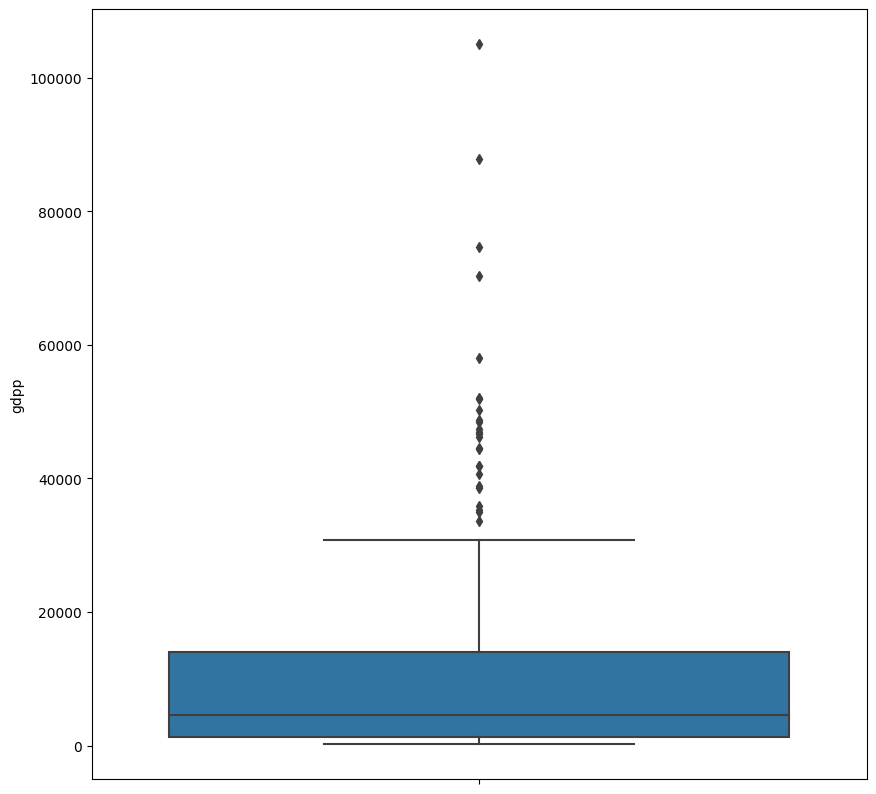

In [232]:
int_cols = df_country.select_dtypes(exclude=['object']).columns
for _ in int_cols:
    plt.figure(figsize=(10, 10))
    sns.boxplot(data=df_country, y=_)
    plt.show()

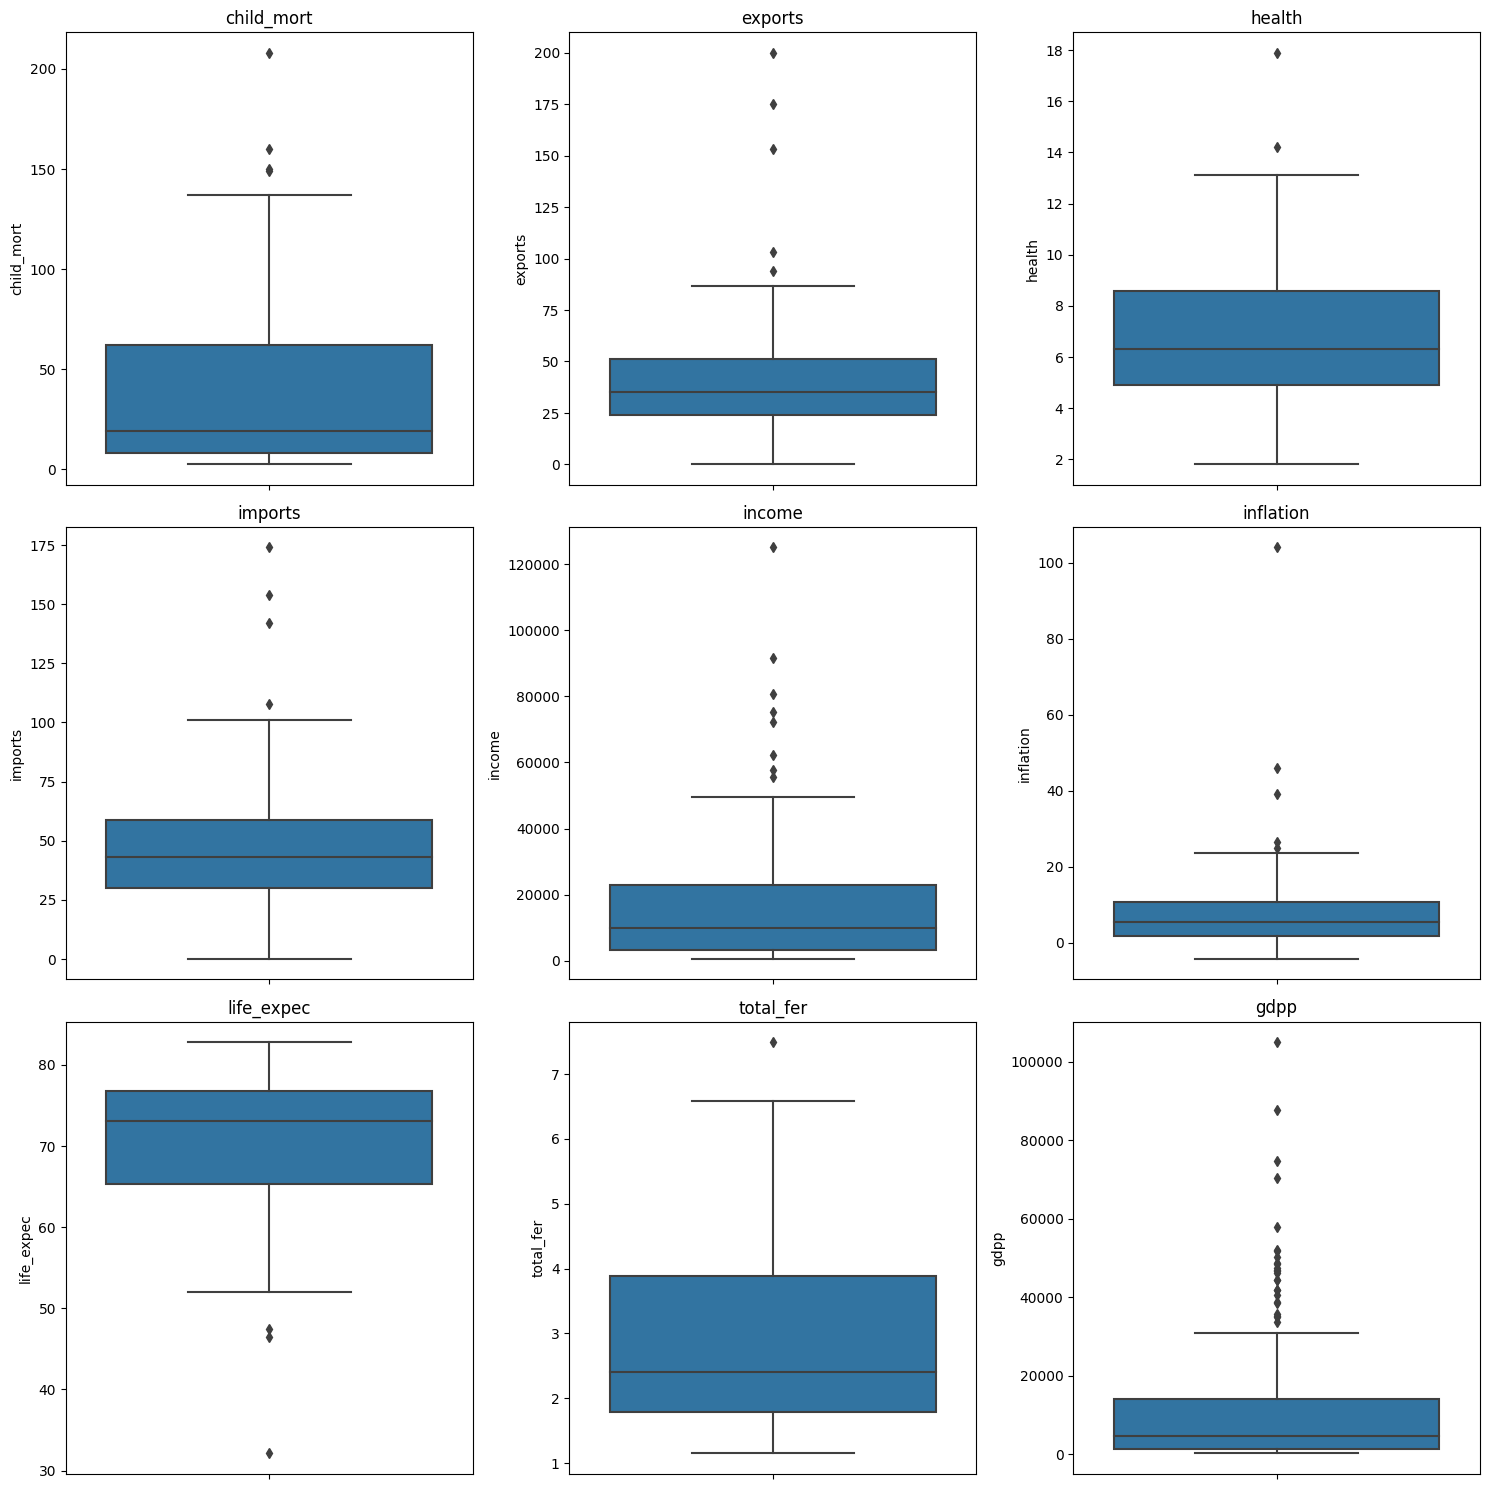

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

int_cols = df_country.select_dtypes(exclude='object').columns
num_plots = len(int_cols)
rows = 3  # Número de filas deseadas
cols = num_plots // rows + (num_plots % rows > 0)  # Número de columnas deseadas

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  # Ajusta el tamaño de la figura según tus necesidades

for i, col in enumerate(int_cols):
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]  # Obtén el eje correspondiente
    sns.boxplot(data=df_country, y=col, ax=ax)
    ax.set_title(col)  # Opcional: establece el título de cada gráfico

plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()

In [234]:
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [235]:

highest_inflation = df_country['inflation'].max()
country_with_highest_inflation = df_country.loc[df_country['inflation'].idxmax(), 'country']

print("The highest inflation value is:", highest_inflation)
print("The country with the highest inflation is:", country_with_highest_inflation)

The highest inflation value is: 104.0
The country with the highest inflation is: Nigeria


/var/folders/3j/6x57938974z0qwy867642sz00000gn/T/ipykernel_1764/1293656263.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_country.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')


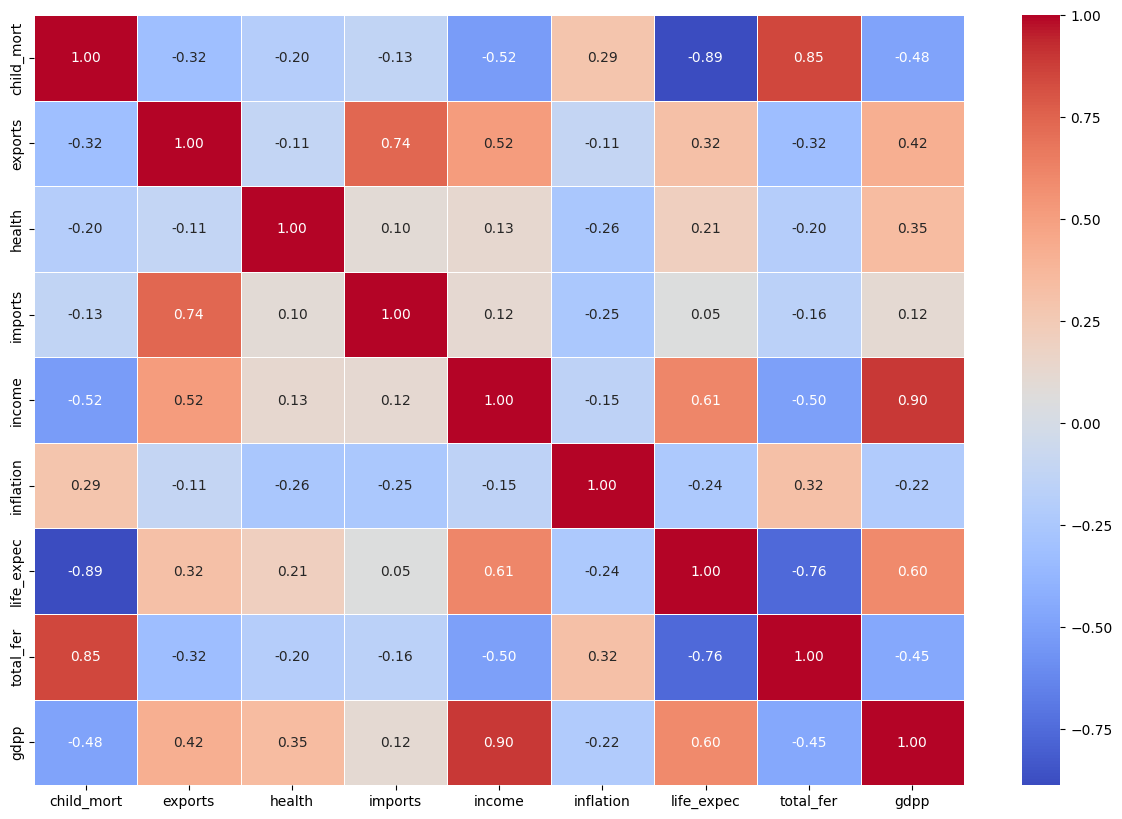

In [236]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(df_country.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.show()

## Escalar datos

In [237]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country.drop('country', axis=1)) # Se eliminan las columnas con nombres
df_country_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [238]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns = df_country.drop('country', axis = 1).columns)

In [239]:
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## PCA

In [240]:
from sklearn.decomposition import PCA

In [241]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [242]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


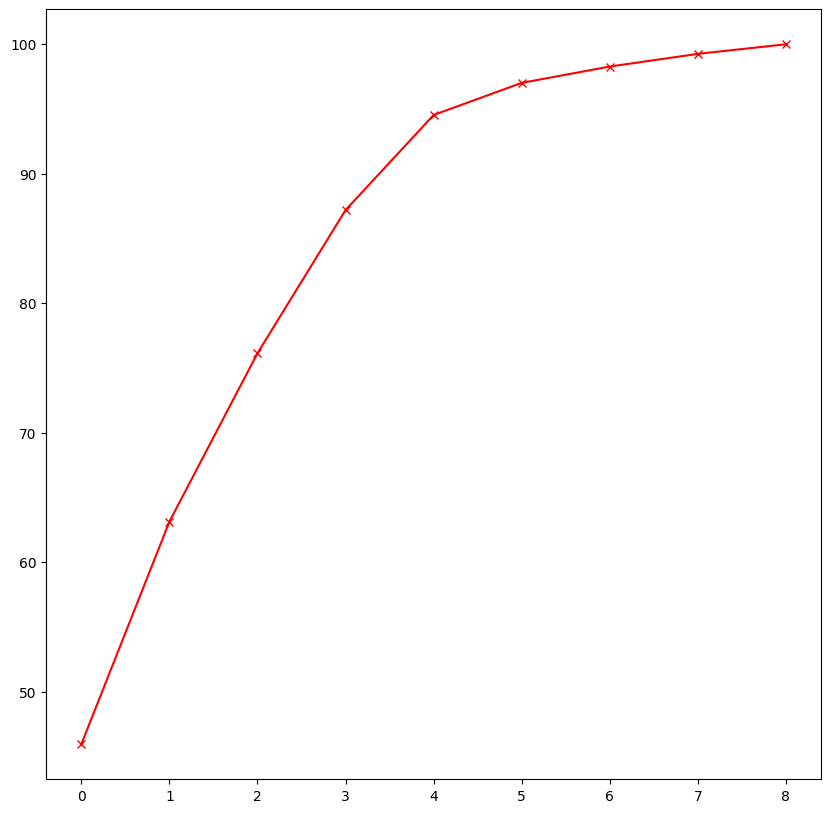

In [243]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

In [244]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8],axis=1,inplace=True)

In [245]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


Text(0, 0.5, '% Variance')

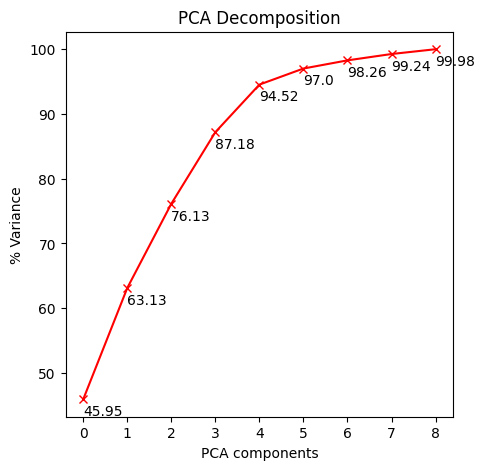

In [246]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
components = list(range(0,9))
plt.figure(figsize=(5,5))
for s,d in zip(components,cum_var):
    plt.annotate(np.round(d,decimals=2), xy=(s,d-2.5))

plt.plot(components,cum_var, 'r-x')
plt.title("PCA Decomposition")
plt.xlabel('PCA components')
plt.ylabel('% Variance')

In [247]:
pcs_needed = np.where(np.cumsum(pca.explained_variance_ratio_) >=.85)[0][0]
print("PC's are needed to explain 85% of the variance for data: ", pcs_needed)

PC's are needed to explain 85% of the variance for data:  3


## Importar librerías para clustering

In [248]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## K-means

### PCA

In [249]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2, 15)
for _ in K:
    kmeans = KMeans(n_clusters=_)
    y = kmeans.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard, y))

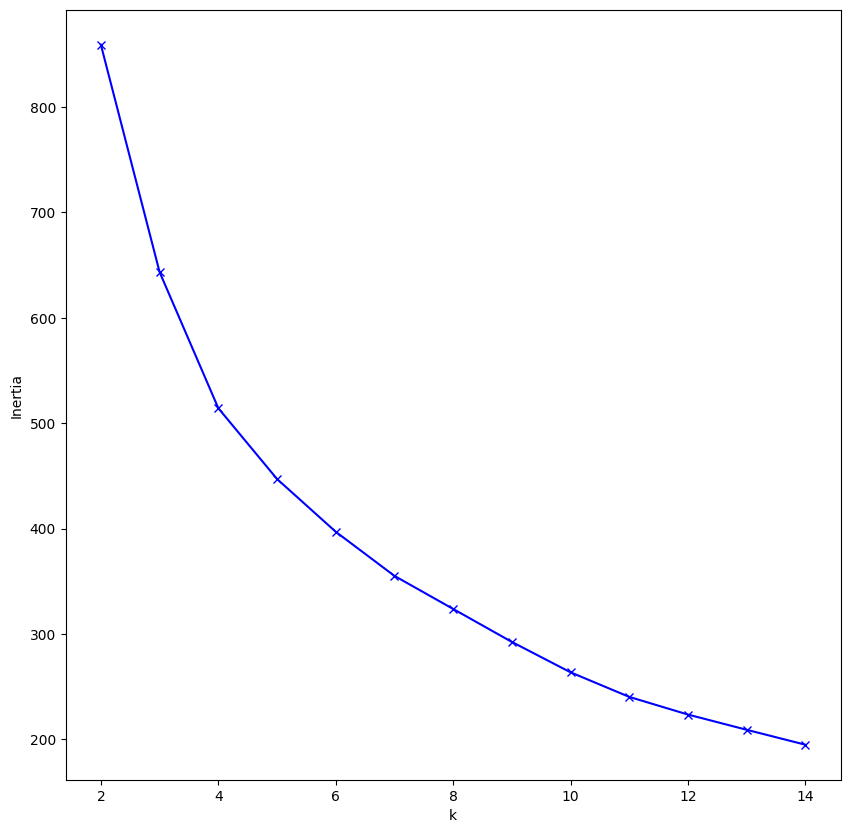

In [250]:
fig = plt.figure(figsize=(10, 10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

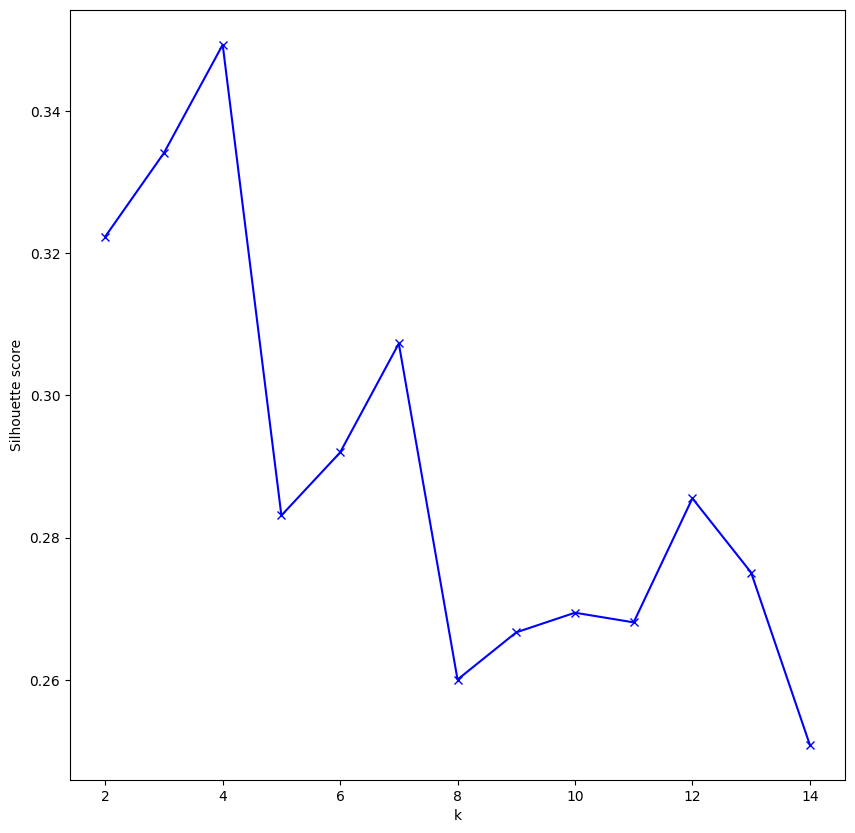

In [251]:
fig = plt.figure(figsize=(10, 10))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In [252]:
km = KMeans(n_clusters=4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_country['k_means_pca'] = y

0.3522170843293593


### Sin PCA

In [253]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2, 15)
for _ in K:
    kmeans = KMeans(n_clusters=_)
    y = kmeans.fit_predict(df_country_scaled)
    Sum_of_squared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled, y))

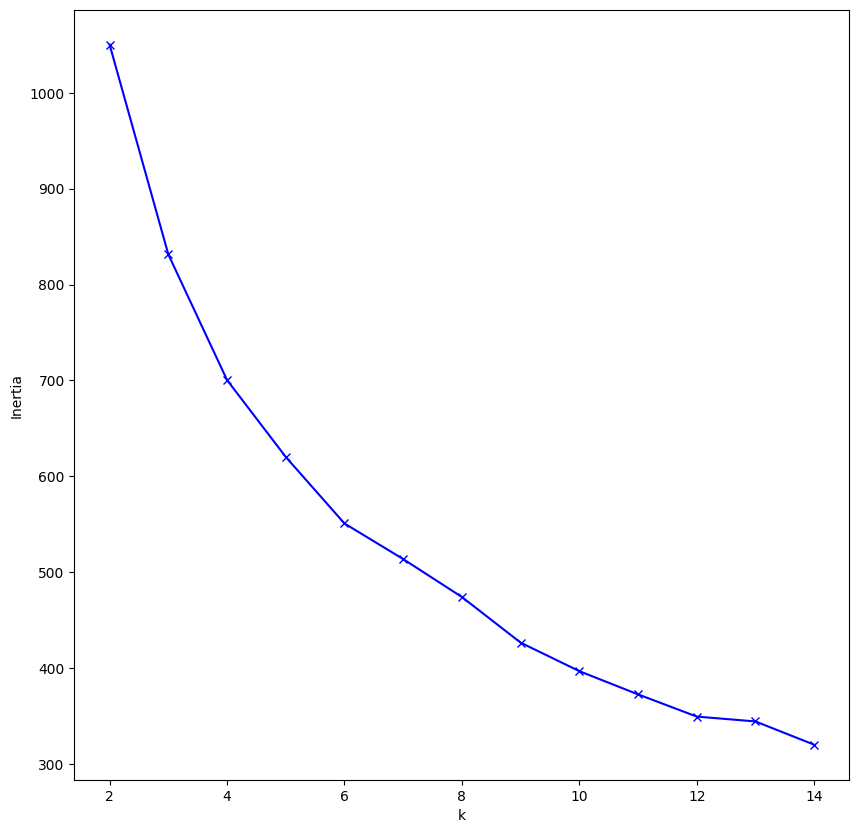

In [254]:
fig = plt.figure(figsize=(10, 10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

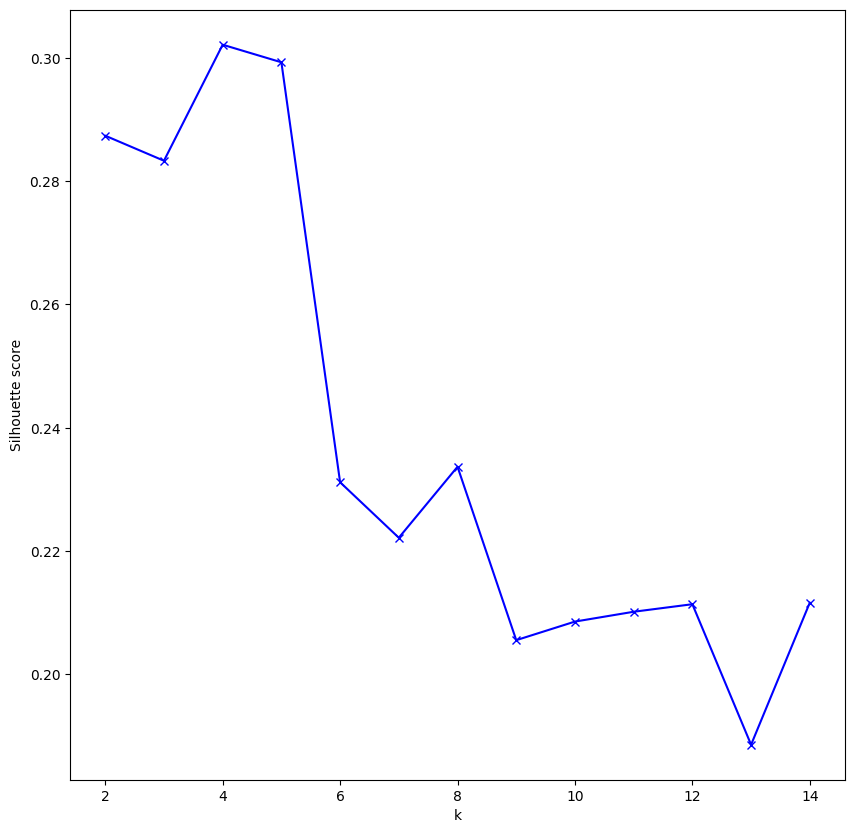

In [255]:
fig = plt.figure(figsize=(10, 10))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In [256]:
km = KMeans(n_clusters=5)
y = km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y))
df_country['k_means_pca'] = y

0.21829471911763598


## Agglomerativen hierarchical clustering

### PCA

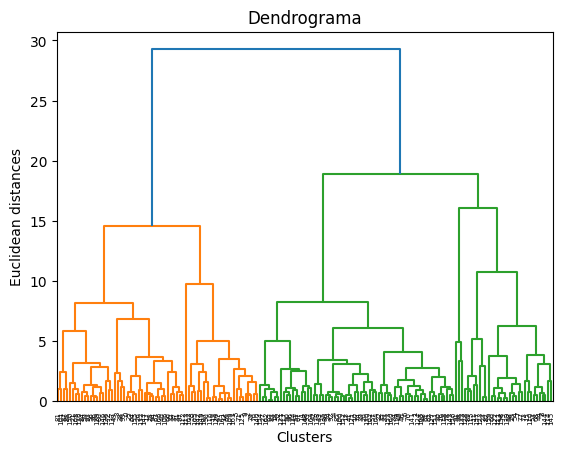

In [257]:
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.show()


In [258]:
AC = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_AC = AC.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_AC))
df_country['hc_pca'] = y_AC

0.3070110704080526


### Sin PCA

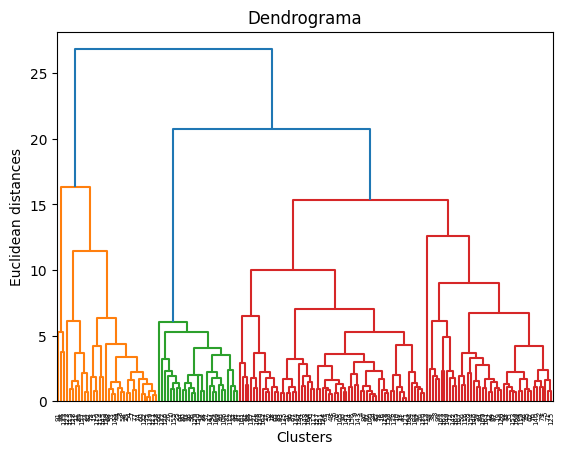

In [259]:
dendrogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.show()


In [260]:
AC = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_AC = AC.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_AC))
df_country['hc_pca'] = y_AC

0.3153134331018189


## DBSCAN

### PCA

In [261]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

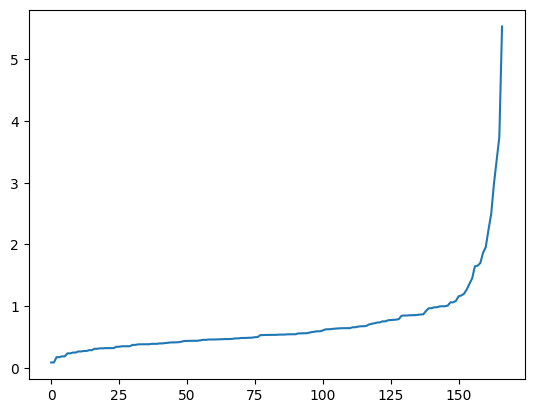

In [262]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [263]:
eps_values = np.arange(0.5,2,0.1)
min_samples_values = np.arange(3,12)

In [264]:
from itertools import product
dbscan_params = list(product(eps_values, min_samples_values))
no_of_clusters = []
sil_score = []
for p in dbscan_params:
    dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard, dbscan))
        
    except:
        sil_score.append(0)
    no_of_clusters.append(len(np.unique(dbscan)))
        

    

In [265]:
df_param_tuning = pd.DataFrame.from_records(dbscan_params, columns=['Eps','Min_samples'])
df_param_tuning['sil_score'] = sil_score
df_param_tuning['n_clusters'] = no_of_clusters

In [266]:
pivot_1 = pd.pivot_table(df_param_tuning, values='sil_score', columns='Eps',index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tuning, values='n_clusters', columns='Eps',index='Min_samples')


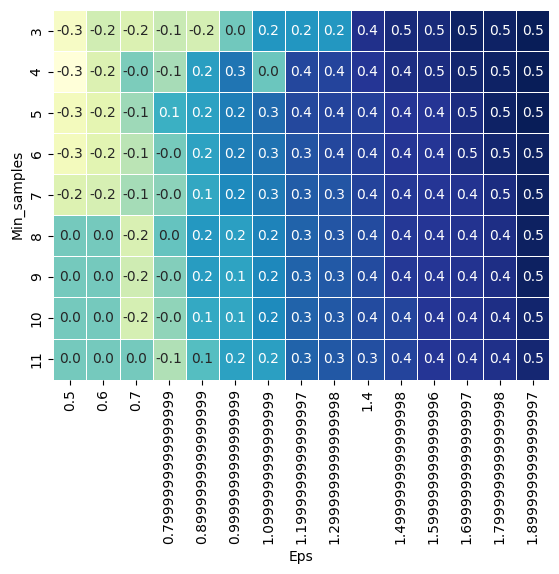

In [267]:
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", fmt=".1f", linewidths=.5, cbar=False)
plt.show()

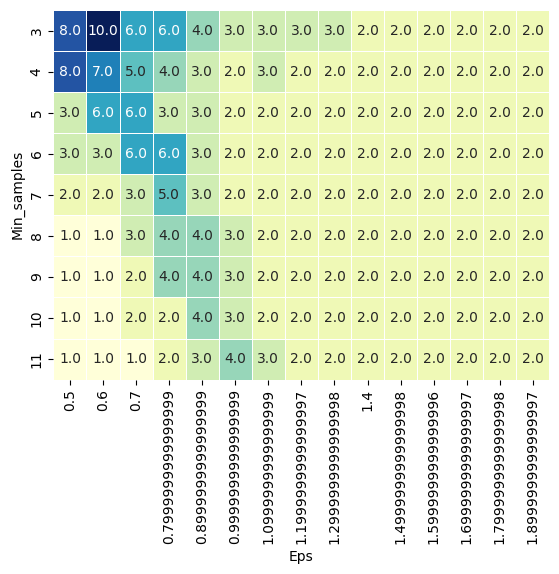

In [268]:
sns.heatmap(pivot_2, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", fmt=".1f", linewidths=.5, cbar=False)
plt.show()

In [274]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print("Silhouette score: %0.3f" % silhouette_score(pca_data_standard, y_dbscan))
df_country['dbscan'] = y_dbscan

Silhouette score: 0.186


### Sin PCA

## Evaluación de resultados